In [1]:
from models import *
from train import *
from plot import *
from utils import *
from explore import *
import matplotlib.pyplot as plt


# Manual model testing

In [2]:
# Import dataset
train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(
    1000)


In [4]:
# Ethan

# model_builder = Siamese
# model_params = {
#     'fc_parameters': {'input_size': 64}
# }
# model = model_builder(**model_params)

# model_builder = CNN
# model_params = {
#     'conv_block_parameters': None,
#     'fc_parameters': None,
#     'predict': build_predictFC(),
# }
# model = model_builder(**model_params)


In [5]:
# Raphael

model_builder = BaseLineNet
model_params = {}
model = model_builder(**model_params)

# model_builder = SiameseConvNet1
# model_params = {}
# model = model_builder(**model_params)

# model_builder = SiameseConvNet2
# model_params = {}
# model = model_builder(**model_params)


In [6]:
# Kathleen
# Specify one_hot_classes=True, one_hot_leq=True

# model_builder = SiameseNN
# model_params = {}
# model = model_builder(**model_params)

# model_builder = SiameseNNAll
# model_params = {}
# model = model_builder(**model_params)

# model_builder = Siamese2
# model_params = {}
# model = model_builder(**model_params)

# model_builder = SiameseAll
# model_params = {}
# model = model_builder(**model_params)


In [7]:
device = torch.device('cpu')
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

show_values = False

_train_input = train_input[0:5]
_train_target = train_target[0:5]
_train_classes = train_classes[0:5]

one_hot_classes = True
one_hot_leq = False
_data_input, _data_target, _data_classes = \
    preprocess_dataset(_train_input, _train_target, _train_classes,
                       one_hot_classes=one_hot_classes, one_hot_leq=one_hot_leq,
                       device=device)

print(f'train input: size={_train_input.size()}, dtype={_train_input.dtype}')
print(
    f'train target: size={_train_target.size()}, dtype={_train_target.dtype}')
print(
    f'train classes: size={_train_classes.size()}, dtype={_train_classes.dtype}')

print()
print(f'data input: size={_data_input.size()}, dtype={_data_input.dtype}')
print(f'data target: size={_data_target.size()}, dtype={_data_target.dtype}')
print(
    f'data classes: size={_data_classes.size()}, dtype={_data_classes.dtype}')

with torch.no_grad():
    pred_leq, (pred_class0, pred_class1) = model(_data_input)
    print()
    if pred_leq is not None:
        print(
            f'Less or equal output: size={pred_leq.size()}, dtype={pred_leq.dtype}')
        if show_values:
            print(pred_leq)
    if pred_class0 is not None:
        print(
            f'Class0 output: size={pred_class0.size()}, dtype={pred_class0.dtype}{pred_class0 if show_values else ""}')
        if show_values:
            print(pred_class0)
    if pred_class1 is not None:
        print(
            f'Class1 output: size={pred_class1.size()}, dtype={pred_class1.dtype}{pred_class1 if show_values else ""}')
        if show_values:
            print(pred_class1)


out_leq, (out_class0, out_class1) = output_to_predictions(pred_leq, pred_class0,
                                                          pred_class1, one_hot_classes=one_hot_classes, one_hot_leq=one_hot_leq)
print()
if out_leq is not None:
    print(
        f'Less or equal prediction: size={out_leq.size()}, dtype={out_leq.dtype}')
    if show_values:
        print(out_leq)
if out_class0 is not None:
    print(
        f'Class0 prediction: size={out_class0.size()}, dtype={out_class0.dtype}{out_class0 if show_values else ""}')
    if show_values:
        print(out_class0)
if out_class1 is not None:
    print(
        f'Class1 prediction: size={out_class1.size()}, dtype={out_class1.dtype}{out_class1 if show_values else ""}')
    if show_values:
        print(out_class1)

if show_values:
    print()
    print(f'target:\n{_train_target}')
    print(f'classes:\n{_train_classes}')

acc_classes = ((out_class0 == _train_classes[:, 0]) & (
    out_class1 == _train_classes[:, 1])).float().mean().item()
print()
print(f'Accuracy classes: {acc_classes}')


train input: size=torch.Size([5, 2, 14, 14]), dtype=torch.float32
train target: size=torch.Size([5]), dtype=torch.int64
train classes: size=torch.Size([5, 2]), dtype=torch.int64

data input: size=torch.Size([5, 2, 14, 14]), dtype=torch.float32
data target: size=torch.Size([5, 1]), dtype=torch.float32
data classes: size=torch.Size([5, 2, 10]), dtype=torch.float32

Less or equal output: size=torch.Size([5, 1]), dtype=torch.float32
Class0 output: size=torch.Size([5, 10]), dtype=torch.float32
Class1 output: size=torch.Size([5, 10]), dtype=torch.float32

Less or equal prediction: size=torch.Size([5, 1]), dtype=torch.int64
Class0 prediction: size=torch.Size([5]), dtype=torch.int64
Class1 prediction: size=torch.Size([5]), dtype=torch.int64

Accuracy classes: 0.0


In [8]:
# Model parameters
summary(model, input_size=(1, 2, 14, 14))


Layer (type:depth-idx)                   Output Shape              Param #
BaseLineNet                              [1, 1]                    --
├─Linear: 1-1                            [1, 150]                  58,950
├─Linear: 1-2                            [1, 80]                   12,080
├─Linear: 1-3                            [1, 20]                   1,620
├─Linear: 1-4                            [1, 1]                    21
Total params: 72,671
Trainable params: 72,671
Non-trainable params: 0
Total mult-adds (M): 0.07
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.29
Estimated Total Size (MB): 0.29

## Single cycle testing

In [9]:
model = model_builder(**model_params)

# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

start = time.perf_counter()
info_cycle = train_model(model,
                         train_input, train_target, train_classes,
                         nb_epochs=100, mini_batch_size=100,
                         criterion_classes=nn.CrossEntropyLoss(), criterion_classes_params={'input': 'pred_class{i}', 'target': 'data_classes{i}'},
                         criterion_leq=nn.BCELoss(), criterion_leq_params={'input': 'pred_leq', 'target': 'data_target'},
                         optimizer=torch.optim.Adam(
                             model.parameters(), lr=5e-4),
                         weight_loss_classes=0.5, weight_loss_leq=0.5,
                         freeze_epochs=0,
                         one_hot_classes=True, one_hot_leq=False,
                         verbose=False,
                         test_input=test_input, test_target=test_target, test_classes=test_classes,
                         unsqueeze_leq=True,
                         device=device)
end = time.perf_counter()
print(f'Time: {end - start:.2f}s')


Time: 1.43s


In [10]:
with torch.no_grad():
    # pred_leq, (pred_class0, pred_class1) = model(train_input)
    pred_leq, (pred_class0, pred_class1) = compute_predictions(model, train_input.to(device),
                                                               one_hot_classes=one_hot_classes, one_hot_leq=one_hot_leq)

    # print(pred_leq.size(), train_target.size())
    if pred_leq is not None:
        acc_leq = (pred_leq == train_target.unsqueeze(
            1).to(device)).float().mean().item()
        print(f'Accuracy on the training set: {acc_leq:.4f}')
    print(classification_report(train_classes[:, 0], pred_class0.cpu(
    ), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))
    print(classification_report(train_classes[:, 1], pred_class1.cpu(
    ), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))


Accuracy on the training set: 0.9900
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.98      1.00      0.99       115
           2       0.93      0.97      0.95        98
           3       0.97      0.90      0.93       100
           4       0.97      0.98      0.98       102
           5       0.98      0.97      0.97        95
           6       1.00      0.98      0.99       106
           7       1.00      0.98      0.99        98
           8       0.95      0.98      0.97       106
           9       0.98      0.99      0.98        91

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.97      1000

              precision    recall  f1-score   support

           0       0.36      0.96      0.52       102
           1       0.97      0.60      0.74       120
           2       0.98      0.53      0.

/home/ethan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ethan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ethan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


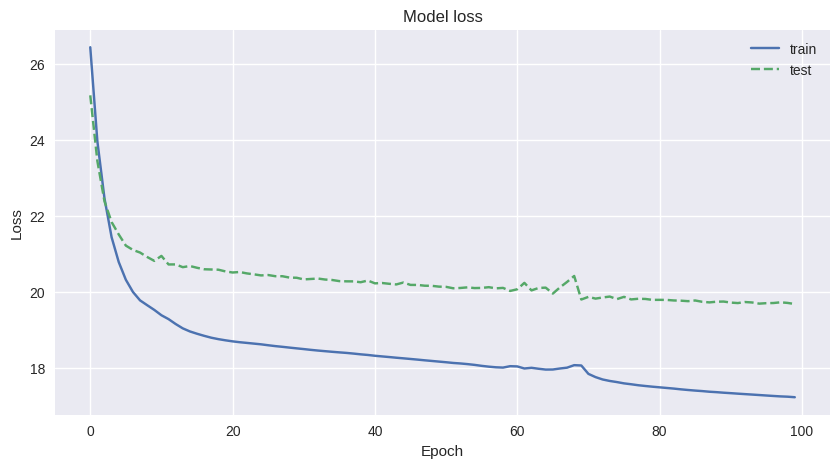

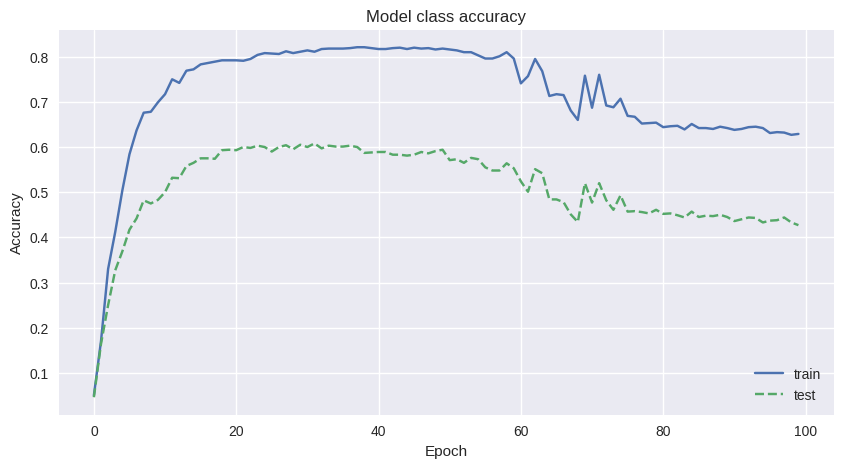

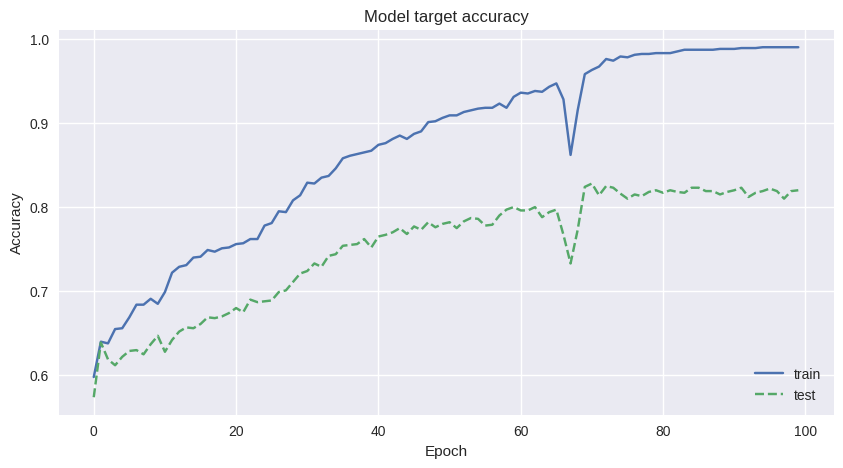

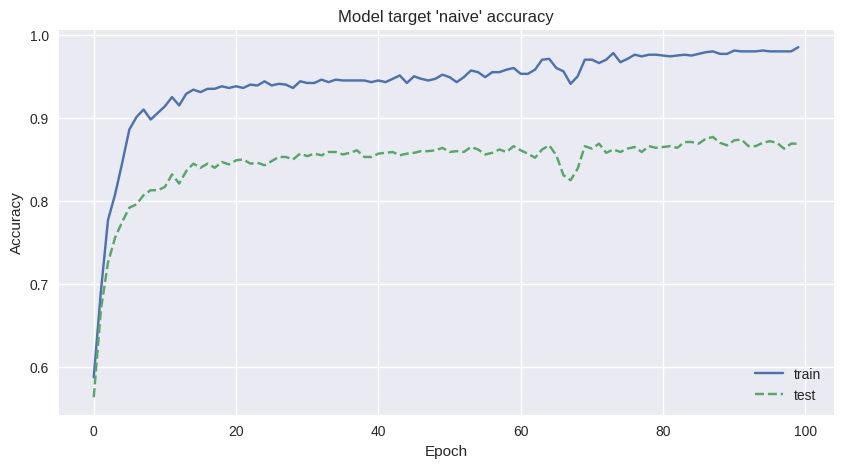

[<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>]

In [11]:
plot_info_cycle(info_cycle)


## Multiple cycle testing

In [13]:
# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

params = {'model_builder': model_builder, 'model_params': model_params,
          'nb_epochs': 100, 'mini_batch_size': 100,
          'criterion_classes': nn.CrossEntropyLoss(), 'criterion_classes_params': {'input': 'pred_class{i}', 'target': 'data_classes{i}'},
          'criterion_leq': nn.BCELoss(), 'criterion_leq_params': {'input': 'pred_leq', 'target': 'data_target'},
          'optimizer_builder': torch.optim.Adam, 'optimizer_params': {'lr': 5e-4},
          'weight_loss_classes': 0.5, 'weight_loss_leq': 0.5,
          'freeze_epochs': 0,
          'one_hot_classes': True, 'one_hot_leq': False,
          'unsqueeze_leq': True,
          'device': device,
          'n_cycle': 10
          }

info = evaluate_model(**params)


Cycle 1/10
Epoch 1/100 - Train loss: 26.6327
Epoch 1/100 - Test loss: 26.0128
Epoch 2/100 - Train loss: 25.1734
Epoch 2/100 - Test loss: 24.7860
Epoch 3/100 - Train loss: 23.7601
Epoch 3/100 - Test loss: 23.5377
Epoch 4/100 - Train loss: 22.4695
Epoch 4/100 - Test loss: 22.6677
Epoch 5/100 - Train loss: 21.5610
Epoch 5/100 - Test loss: 22.1610
Epoch 6/100 - Train loss: 21.0975
Epoch 6/100 - Test loss: 22.0086
Epoch 7/100 - Train loss: 20.7313
Epoch 7/100 - Test loss: 21.7225
Epoch 8/100 - Train loss: 20.3126
Epoch 8/100 - Test loss: 21.5444
Epoch 9/100 - Train loss: 19.9590
Epoch 9/100 - Test loss: 21.1933
Epoch 10/100 - Train loss: 19.6841
Epoch 10/100 - Test loss: 21.1016
Epoch 11/100 - Train loss: 19.5234
Epoch 11/100 - Test loss: 21.1286
Epoch 12/100 - Train loss: 19.3696
Epoch 12/100 - Test loss: 21.0577
Epoch 13/100 - Train loss: 19.3039
Epoch 13/100 - Test loss: 20.9675
Epoch 14/100 - Train loss: 19.1918
Epoch 14/100 - Test loss: 20.9830
Epoch 15/100 - Train loss: 19.1115
Epoch 

train_loss: 17.2529 ± 0.5433
train_acc_leq: 0.9665 ± 0.0252
train_acc_classes: 0.7140 ± 0.0730
train_acc_naive: 0.9665 ± 0.0314
test_loss: 19.6138 ± 0.3487
test_acc_leq: 0.8054 ± 0.0142
test_acc_classes: 0.4708 ± 0.0469
test_acc_naive: 0.8522 ± 0.0210

train_loss:
17.6697 16.7719 16.9142 16.8948 17.0005 17.1327 16.9049 16.9481 18.6021 17.6905 
train_acc_leq:
0.9360 0.9870 0.9890 0.9890 0.9800 0.9450 0.9880 0.9700 0.9130 0.9680 
train_acc_classes:
0.7030 0.6670 0.6320 0.6360 0.7870 0.7470 0.7950 0.8270 0.6060 0.7400 
train_acc_naive:
0.9500 0.9910 0.9780 0.9790 0.9790 0.9750 0.9850 0.9900 0.8800 0.9580 
test_loss:
19.8809 19.2321 19.3921 19.6011 19.3696 19.6179 19.3995 19.4677 20.5197 19.6572 
test_acc_leq:
0.7860 0.8280 0.8240 0.8130 0.7990 0.7960 0.8060 0.8090 0.7820 0.8110 
test_acc_classes:
0.4710 0.4890 0.3930 0.4000 0.5160 0.4700 0.5190 0.5200 0.4220 0.5080 
test_acc_naive:
0.8470 0.8740 0.8550 0.8610 0.8630 0.8480 0.8480 0.8710 0.7950 0.8600 


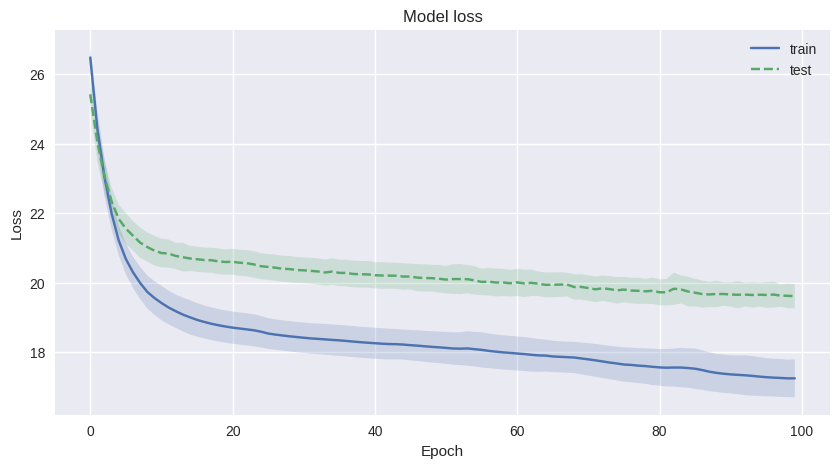

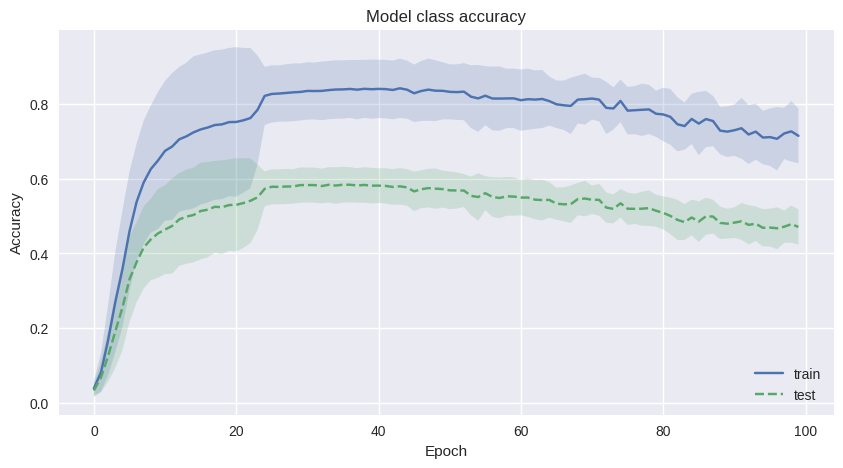

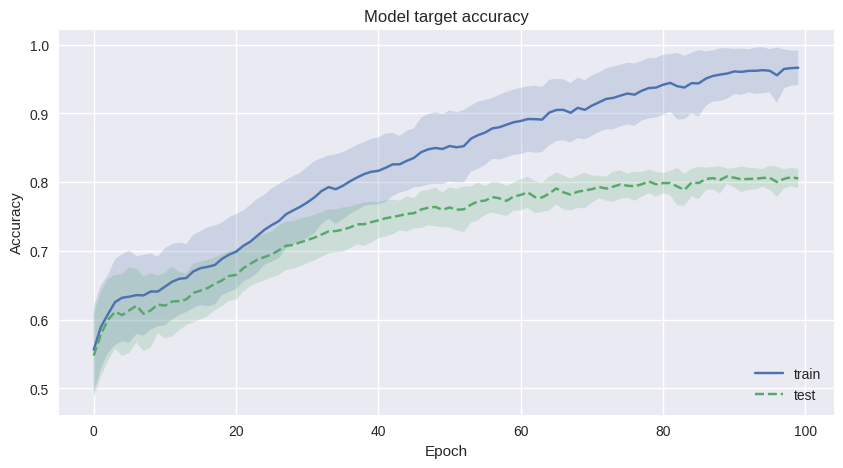

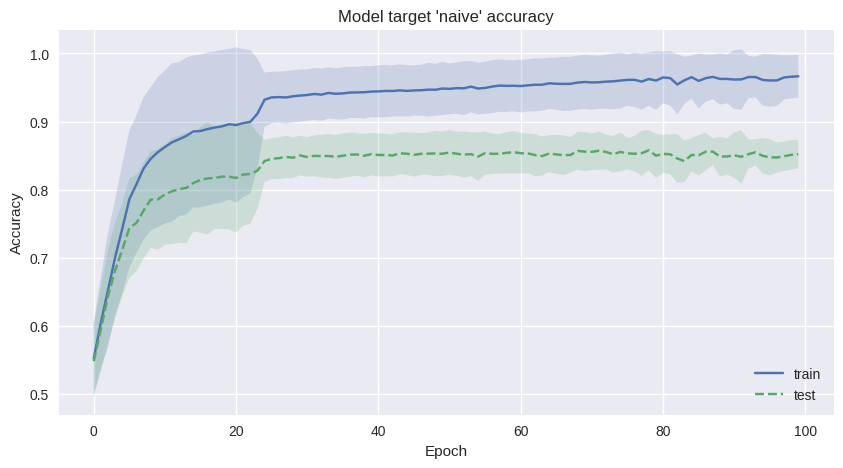

In [14]:
stats = info_stats(info)

# Print the stats last epoch
for mode in ['train', 'test']:
    for metric in ['loss', 'acc_leq', 'acc_classes', 'acc_naive']:
        print(f'{mode}_{metric}: {stats[mode][metric]["mean"][-1]:.4f} ± {stats[mode][metric]["std"][-1]:.4f}')

print()
# Print the info last epoch for each cycle
for mode in ['train', 'test']:
    for metric in ['loss', 'acc_leq', 'acc_classes', 'acc_naive']:
        print(f'{mode}_{metric}:')
        for i in range(len(info[mode][metric])):
            print(f'{info[mode][metric][i][-1]:.4f}', end=' ')
        print()


export_info(info, 'info.json')
export_info(stats, 'stats.json')

# plot_stats(stats, **SAVE_ARGS, path='/home/ethan/Desktop/Deep Learning/dlc-2022-project/Project/')
plot_stats(stats)


# Automated grid search

In [13]:
while (out := input('Proceed with the automated search? [y/n] ')) != 'y':
    if out == 'n':
        break


## Different model types

In [14]:
MODELS = []

# SIAMESE
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict1 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

# MODELS.extend(parameters_combinations_from_dict(model_dict1))

# BASELINE

model_dict2 = {
    'model_builder': [BaseLineNet],
    'model_params': [{}],
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

# MODELS.extend(parameters_combinations_from_dict(model_dict2))

# SIAMESE CONVNET 1

model_dict3 = {
    'model_builder': [SiameseConvNet1],
    'model_params': [{}],
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

# MODELS.extend(parameters_combinations_from_dict(model_dict3))

# SIAMESE CONVNET 2

model_dict4 = {
    'model_builder': [SiameseConvNet2],
    'model_params': [{}],
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict4))

# SIAMESE NN

model_dict5 = {
    'model_builder': [SiameseNN],
    'model_params': [{}],
    'one_hot_classes': [True],
    'one_hot_leq': [True],
    'unsqueeze_leq': [True],
}

# MODELS.extend(parameters_combinations_from_dict(model_dict5))

# SIAMESE NN ALL

model_dict6 = {
    'model_builder': [SiameseNNAll],
    'model_params': [{}],
    'one_hot_classes': [True],
    'one_hot_leq': [True],
    'unsqueeze_leq': [True],
}

# MODELS.extend(parameters_combinations_from_dict(model_dict6))

# SIAMESE 2

model_dict7 = {
    'model_builder': [Siamese2],
    'model_params': [{}],
    'one_hot_classes': [True],
    'one_hot_leq': [True],
    'unsqueeze_leq': [True],
}

# MODELS.extend(parameters_combinations_from_dict(model_dict7))


In [15]:
nb_epochs_list = [100]
mini_batch_size_list = [100]

default_criterion_classes_params = {
    'input': 'pred_class{i}', 'target': 'data_classes{i}'}
criterion_classes_tuple = [
    (nn.CrossEntropyLoss(), default_criterion_classes_params)]
criterion_classes_combination = [dict(zip(['criterion_classes', 'criterion_classes_params'],
                                      criterion_classes_tuple)) for criterion_classes_tuple in criterion_classes_tuple]

default_criterion_leq_params = {'input': 'pred_leq', 'target': 'data_target'}
criterion_leq_tuples = [(nn.BCELoss(), default_criterion_leq_params)]
criterion_leq_combination = [dict(zip(['criterion_leq', 'criterion_leq_params'], criterion_leq_tuple))
                             for criterion_leq_tuple in criterion_leq_tuples]

default_optimizer_params = {'lr': 5e-4}
optimizer_tuples = [(torch.optim.Adam, default_optimizer_params)]
optimizer_combination = [dict(zip(['optimizer_builder', 'optimizer_params'], optimizer_tuple))
                         for optimizer_tuple in optimizer_tuples]

weight_loss_tuples = [(0.0, 1.0), (1.0, 0.0), (0.5, 0.5)]
weight_loss_combination = [dict(zip(
    ['weight_loss_classes', 'weight_loss_leq'], wl_tuple)) for wl_tuple in weight_loss_tuples]

freeze_epochs_list = [0]

device = torch.device('cpu')
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_list = [device]

n_cycle_list = [10]

TRAINING = parameters_combinations(
    nb_epochs_list,
    mini_batch_size_list,
    freeze_epochs_list,
    device_list,
    n_cycle_list,
    labels=[
        'nb_epochs',
        'mini_batch_size',
        'freeze_epochs',
        'device',
        'n_cycle'
    ]
)
TRAINING = mix_parameters_combinations(TRAINING, criterion_classes_combination,
                                       criterion_leq_combination, optimizer_combination, weight_loss_combination)


In [16]:
FINAL = mix_parameters_combinations(MODELS, TRAINING)
print(len(FINAL))


15


In [17]:
# print(len(MODELS))
# print(len(TRAINING))
# print(len(MODELS) * len(TRAINING))
# print(len(FINAL))
# print(FINAL[0])
# print(TRAINING[0])
# print(MODELS[0])
# print_parameters_combinations(TRAINING)
# print(len(parameters_combinations_from_dict(model_dict1)))
# print(len(parameters_combinations_from_dict(model_dict2)))
# print(len(parameters_combinations_from_dict(model_dict1)
#           + parameters_combinations_from_dict(model_dict2)))
# print(model_params[0])
# print(conv_block_parameters[0])


In [18]:
path = create_folder_with_datetime('Experiments')
for i, params in enumerate(FINAL):
    path_dir = os.path.join(path, params['model_builder'].__name__, str(i))
    os.makedirs(path_dir, exist_ok=True)
    export_parameters(params, os.path.join(path_dir, 'parameters.json'))

    info = evaluate_model(**params)

    stats = info_stats(info)
    export_info(info, os.path.join(path_dir, 'info.json'))
    export_info(stats, os.path.join(path_dir, 'stats.json'))
    plot_stats(stats, **SAVE_ARGS, path=path_dir)


Cycle 1/10
Epoch 1/25 - Train loss: 6.8644
Epoch 1/25 - Test loss: 6.8906
Epoch 2/25 - Train loss: 6.8598
Epoch 2/25 - Test loss: 6.8902
Epoch 3/25 - Train loss: 6.8597
Epoch 3/25 - Test loss: 6.8902
Epoch 4/25 - Train loss: 6.8597
Epoch 4/25 - Test loss: 6.8903
Epoch 5/25 - Train loss: 6.8597
Epoch 5/25 - Test loss: 6.8904
Epoch 6/25 - Train loss: 6.8597
Epoch 6/25 - Test loss: 6.8905
Epoch 7/25 - Train loss: 6.8597
Epoch 7/25 - Test loss: 6.8905
Epoch 8/25 - Train loss: 6.8597
Epoch 8/25 - Test loss: 6.8905
Epoch 9/25 - Train loss: 6.8597
Epoch 9/25 - Test loss: 6.8905
Epoch 10/25 - Train loss: 6.8597
Epoch 10/25 - Test loss: 6.8905
Epoch 11/25 - Train loss: 6.8597
Epoch 11/25 - Test loss: 6.8905
Epoch 12/25 - Train loss: 6.8597
Epoch 12/25 - Test loss: 6.8905
Epoch 13/25 - Train loss: 6.8597
Epoch 13/25 - Test loss: 6.8905
Epoch 14/25 - Train loss: 6.8597
Epoch 14/25 - Test loss: 6.8905
Epoch 15/25 - Train loss: 6.8597
Epoch 15/25 - Test loss: 6.8905
Epoch 16/25 - Train loss: 6.8597

## Siamese variations

In [54]:
nb_epochs_list = [100]
mini_batch_size_list = [100]

default_criterion_classes_params = {
    'input': 'pred_class{i}', 'target': 'data_classes{i}'}
criterion_classes_tuple = [
    (nn.CrossEntropyLoss(), default_criterion_classes_params)]
criterion_classes_combination = [dict(zip(['criterion_classes', 'criterion_classes_params'],
                                      criterion_classes_tuple)) for criterion_classes_tuple in criterion_classes_tuple]

default_criterion_leq_params = {'input': 'pred_leq', 'target': 'data_target'}
criterion_leq_tuples = [(nn.BCELoss(), default_criterion_leq_params)]
criterion_leq_combination = [dict(zip(['criterion_leq', 'criterion_leq_params'], criterion_leq_tuple))
                             for criterion_leq_tuple in criterion_leq_tuples]

default_optimizer_params = {'lr': 5e-4}
optimizer_tuples = [(torch.optim.Adam, default_optimizer_params)]
optimizer_combination = [dict(zip(['optimizer_builder', 'optimizer_params'], optimizer_tuple))
                         for optimizer_tuple in optimizer_tuples]

weight_loss_tuples = [(0.5, 0.5)]
weight_loss_combination = [dict(zip(
    ['weight_loss_classes', 'weight_loss_leq'], wl_tuple)) for wl_tuple in weight_loss_tuples]

freeze_epochs_list = [0]

# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_list = [device]

n_cycle_list = [10]

TRAINING = parameters_combinations(
    nb_epochs_list,
    mini_batch_size_list,
    freeze_epochs_list,
    device_list,
    n_cycle_list,
    labels=[
        'nb_epochs',
        'mini_batch_size',
        'freeze_epochs',
        'device',
        'n_cycle'
    ]
)
TRAINING = mix_parameters_combinations(TRAINING, criterion_classes_combination,
                                       criterion_leq_combination, optimizer_combination, weight_loss_combination)


### Different loss functions

In [55]:
MODELS = []

# ORIGINAL
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict1 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict1))

# nn.ELU
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ELU()],
    'activation2': [nn.ELU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ELU()],
    'activation2': [nn.ELU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict2 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict2))

# nn.GELU
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.GELU()],
    'activation2': [nn.GELU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.GELU()],
    'activation2': [nn.GELU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict3 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict3))

# nn.LeakyReLU
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.LeakyReLU()],
    'activation2': [nn.LeakyReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.LeakyReLU()],
    'activation2': [nn.LeakyReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict4 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict4))

# nn.Sigmoid
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.Sigmoid()],
    'activation2': [nn.Sigmoid()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.Sigmoid()],
    'activation2': [nn.Sigmoid()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict5 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict5))

In [59]:
FINAL = mix_parameters_combinations(MODELS, TRAINING)
print(len(FINAL))

1


In [60]:
path = create_folder_with_datetime('Experiments')
for i, params in enumerate(FINAL):
    path_dir = os.path.join(path, params['model_builder'].__name__, str(i))
    os.makedirs(path_dir, exist_ok=True)
    export_parameters(params, os.path.join(path_dir, 'parameters.json'))

    info = evaluate_model(**params)

    stats = info_stats(info)
    export_info(info, os.path.join(path_dir, 'info.json'))
    export_info(stats, os.path.join(path_dir, 'stats.json'))
    plot_stats(stats, **SAVE_ARGS, path=path_dir)


Cycle 1/10
Epoch 1/100 - Train loss: 23.2181
Epoch 1/100 - Test loss: 24.7691
Epoch 2/100 - Train loss: 22.2016
Epoch 2/100 - Test loss: 22.3317


/home/ethan/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 3/100 - Train loss: 21.8697
Epoch 3/100 - Test loss: 22.0368
Epoch 4/100 - Train loss: 21.6313
Epoch 4/100 - Test loss: 21.8561
Epoch 5/100 - Train loss: 21.4391
Epoch 5/100 - Test loss: 21.8241
Epoch 6/100 - Train loss: 21.2691
Epoch 6/100 - Test loss: 21.6699
Epoch 7/100 - Train loss: 21.1185
Epoch 7/100 - Test loss: 21.5077
Epoch 8/100 - Train loss: 20.9822
Epoch 8/100 - Test loss: 21.3113
Epoch 9/100 - Train loss: 20.8545
Epoch 9/100 - Test loss: 21.1969
Epoch 10/100 - Train loss: 20.7338
Epoch 10/100 - Test loss: 21.1303
Epoch 11/100 - Train loss: 20.6159
Epoch 11/100 - Test loss: 21.1528
Epoch 12/100 - Train loss: 20.5007
Epoch 12/100 - Test loss: 21.1626
Epoch 13/100 - Train loss: 20.3872
Epoch 13/100 - Test loss: 21.1829
Epoch 14/100 - Train loss: 20.2741
Epoch 14/100 - Test loss: 21.2052
Epoch 15/100 - Train loss: 20.1611
Epoch 15/100 - Test loss: 21.2793
Epoch 16/100 - Train loss: 20.0495
Epoch 16/100 - Test loss: 21.3786
Epoch 17/100 - Train loss: 19.9398
Epoch 17/100 

### Batch norm, skip connections 

In [61]:
MODELS = []

# ORIGINAL
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict1 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict1))

# No Batch Norm
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [False],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [False]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict2 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict2))

# No Skip Connections
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [False],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict3 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict3))

# No Batch Norm and no Skip Connections
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [False],
    'use_skip_connections': [False],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [False]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict4 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict4))

In [62]:
FINAL = mix_parameters_combinations(MODELS, TRAINING)
print(len(FINAL))

4


In [63]:
path = create_folder_with_datetime('Experiments')
for i, params in enumerate(FINAL):
    path_dir = os.path.join(path, params['model_builder'].__name__, str(i))
    os.makedirs(path_dir, exist_ok=True)
    export_parameters(params, os.path.join(path_dir, 'parameters.json'))

    info = evaluate_model(**params)

    stats = info_stats(info)
    export_info(info, os.path.join(path_dir, 'info.json'))
    export_info(stats, os.path.join(path_dir, 'stats.json'))
    plot_stats(stats, **SAVE_ARGS, path=path_dir)


Cycle 1/10
Epoch 1/100 - Train loss: 16.9879
Epoch 1/100 - Test loss: 11.6248
Epoch 2/100 - Train loss: 12.4504
Epoch 2/100 - Test loss: 11.2925


/home/ethan/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 3/100 - Train loss: 11.1210
Epoch 3/100 - Test loss: 10.8279
Epoch 4/100 - Train loss: 10.1537
Epoch 4/100 - Test loss: 10.3451
Epoch 5/100 - Train loss: 9.3413
Epoch 5/100 - Test loss: 9.8199
Epoch 6/100 - Train loss: 8.6202
Epoch 6/100 - Test loss: 9.3351
Epoch 7/100 - Train loss: 7.9820
Epoch 7/100 - Test loss: 9.0877
Epoch 8/100 - Train loss: 7.4543
Epoch 8/100 - Test loss: 8.6389
Epoch 9/100 - Train loss: 6.9322
Epoch 9/100 - Test loss: 8.2216
Epoch 10/100 - Train loss: 6.4362
Epoch 10/100 - Test loss: 7.8576
Epoch 11/100 - Train loss: 5.9810
Epoch 11/100 - Test loss: 7.5750
Epoch 12/100 - Train loss: 5.5426
Epoch 12/100 - Test loss: 7.2750
Epoch 13/100 - Train loss: 5.1347
Epoch 13/100 - Test loss: 6.9726
Epoch 14/100 - Train loss: 4.7535
Epoch 14/100 - Test loss: 6.7015
Epoch 15/100 - Train loss: 4.3968
Epoch 15/100 - Test loss: 6.4267
Epoch 16/100 - Train loss: 4.0796
Epoch 16/100 - Test loss: 6.2891
Epoch 17/100 - Train loss: 3.7965
Epoch 17/100 - Test loss: 6.0478
Epoch

### Dropout

In [66]:
MODELS = []

# ORIGINAL
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict1 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict1))

# DROP OUT 0.2
conv_block = {
    'dropout1': [0.2],
    'dropout2': [0.2],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.2],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict2 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict2))

# DROP OUT 0.4
conv_block = {
    'dropout1': [0.4],
    'dropout2': [0.4],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.4],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict3 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict3))

# DROP OUT 0.6
conv_block = {
    'dropout1': [0.6],
    'dropout2': [0.6],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.6],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict4 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict4))

# DROP OUT 0.8
conv_block = {
    'dropout1': [0.8],
    'dropout2': [0.8],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.8],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list,
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict'])

model_dict5 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict5))

In [74]:
FINAL = mix_parameters_combinations(MODELS, TRAINING)
print(len(FINAL))

2


In [75]:
path = create_folder_with_datetime('Experiments')
for i, params in enumerate(FINAL):
    path_dir = os.path.join(path, params['model_builder'].__name__, str(i))
    os.makedirs(path_dir, exist_ok=True)
    export_parameters(params, os.path.join(path_dir, 'parameters.json'))

    info = evaluate_model(**params)

    stats = info_stats(info)
    export_info(info, os.path.join(path_dir, 'info.json'))
    export_info(stats, os.path.join(path_dir, 'stats.json'))
    plot_stats(stats, **SAVE_ARGS, path=path_dir)

Cycle 1/10
Epoch 1/100 - Train loss: 22.6991
Epoch 1/100 - Test loss: 16.6319


/home/ethan/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 2/100 - Train loss: 18.8795
Epoch 2/100 - Test loss: 15.9084
Epoch 3/100 - Train loss: 17.6078
Epoch 3/100 - Test loss: 15.2249
Epoch 4/100 - Train loss: 16.7245
Epoch 4/100 - Test loss: 14.6281
Epoch 5/100 - Train loss: 15.8120
Epoch 5/100 - Test loss: 13.8859
Epoch 6/100 - Train loss: 15.1395
Epoch 6/100 - Test loss: 13.4080
Epoch 7/100 - Train loss: 14.5464
Epoch 7/100 - Test loss: 12.8747
Epoch 8/100 - Train loss: 14.0356
Epoch 8/100 - Test loss: 12.2062
Epoch 9/100 - Train loss: 13.3780
Epoch 9/100 - Test loss: 11.9198
Epoch 10/100 - Train loss: 13.0835
Epoch 10/100 - Test loss: 11.2215
Epoch 11/100 - Train loss: 12.5489
Epoch 11/100 - Test loss: 10.9216
Epoch 12/100 - Train loss: 12.2235
Epoch 12/100 - Test loss: 10.3140
Epoch 13/100 - Train loss: 11.8214
Epoch 13/100 - Test loss: 9.9984
Epoch 14/100 - Train loss: 11.4492
Epoch 14/100 - Test loss: 9.7299
Epoch 15/100 - Train loss: 11.1060
Epoch 15/100 - Test loss: 9.3065
Epoch 16/100 - Train loss: 10.8653
Epoch 16/100 - Tes

### Order activation Batch norm

In [70]:
MODELS = []

# ORIGINAL
conv_block = {
    'dropout1': [0.0],
    'dropout2': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True],
    'use_skip_connections': [True],
}
conv_block_parameters_list = parameters_combinations(
    *conv_block.values(), labels=conv_block.keys())
fc_block = {
    'dropout': [0.0],
    'activation1': [nn.ReLU()],
    'activation2': [nn.ReLU()],
    'use_batch_norm': [True]
}
fc_block_parameters_list = parameters_combinations(
    *fc_block.values(), labels=fc_block.keys())
predict_list = [build_predictFC()]

model_params_list = parameters_combinations(conv_block_parameters_list, fc_block_parameters_list, predict_list, [False, True],
                                            labels=['conv_block_parameters', 'fc_parameters', 'predict', 'ReBa'])

model_dict1 = {
    'model_builder': [Siamese],
    'model_params': model_params_list,
    'one_hot_classes': [True],
    'one_hot_leq': [False],
    'unsqueeze_leq': [True],
}

MODELS.extend(parameters_combinations_from_dict(model_dict1))

In [71]:
FINAL = mix_parameters_combinations(MODELS, TRAINING)
print(len(FINAL))

2


In [72]:
path = create_folder_with_datetime('Experiments')
for i, params in enumerate(FINAL):
    path_dir = os.path.join(path, params['model_builder'].__name__, str(i))
    os.makedirs(path_dir, exist_ok=True)
    export_parameters(params, os.path.join(path_dir, 'parameters.json'))

    info = evaluate_model(**params)

    stats = info_stats(info)
    export_info(info, os.path.join(path_dir, 'info.json'))
    export_info(stats, os.path.join(path_dir, 'stats.json'))
    plot_stats(stats, **SAVE_ARGS, path=path_dir)

Cycle 1/10
Epoch 1/100 - Train loss: 17.1508
Epoch 1/100 - Test loss: 11.0267
Epoch 2/100 - Train loss: 12.2680
Epoch 2/100 - Test loss: 10.3129


/home/ethan/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 3/100 - Train loss: 10.7213
Epoch 3/100 - Test loss: 9.9580
Epoch 4/100 - Train loss: 9.6980
Epoch 4/100 - Test loss: 9.4668
Epoch 5/100 - Train loss: 8.8576
Epoch 5/100 - Test loss: 8.9172
Epoch 6/100 - Train loss: 8.1124
Epoch 6/100 - Test loss: 8.4043
Epoch 7/100 - Train loss: 7.4276
Epoch 7/100 - Test loss: 7.9941
Epoch 8/100 - Train loss: 6.8182
Epoch 8/100 - Test loss: 7.6011
Epoch 9/100 - Train loss: 6.2408
Epoch 9/100 - Test loss: 7.2553
Epoch 10/100 - Train loss: 5.6953
Epoch 10/100 - Test loss: 6.9331
Epoch 11/100 - Train loss: 5.1795
Epoch 11/100 - Test loss: 6.7037
Epoch 12/100 - Train loss: 4.6851
Epoch 12/100 - Test loss: 6.3529
Epoch 13/100 - Train loss: 4.2383
Epoch 13/100 - Test loss: 6.1278
Epoch 14/100 - Train loss: 3.8517
Epoch 14/100 - Test loss: 5.8457
Epoch 15/100 - Train loss: 3.5133
Epoch 15/100 - Test loss: 5.7151
Epoch 16/100 - Train loss: 3.2387
Epoch 16/100 - Test loss: 5.4333
Epoch 17/100 - Train loss: 2.9619
Epoch 17/100 - Test loss: 5.1311
Epoch 18